#**<center>Methods to handle Imbalanced Datasets</center>**

## **Imbalanced Datasets**
* Imbalanced datasets are a special case for classification problem where the class distribution is not uniform among the classes. Typically, they are composed by two classes: The majority (negative) class and the minority (positive) class

**Imbalanced datasets can be found for different use cases in various domains:**

* **Finance:** Fraud detection datasets commonly have a fraud rate of ~1–2%
* **Ad Serving:** Click prediction datasets also don’t have a high clickthrough rate.
* **Transportation/Airline:** Will Airplane failure occur?
* **Medical:** Does a patient has cancer?
* **Content moderation:** Does a post contain NSFW content?

## **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Ingestion to perform different sampling techniques**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Credit Card Defaulter/creditcard.csv')

In [3]:
df = df.sample(n = 10000)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151880,96431.0,-3.013289,-0.063993,-0.477127,-0.518490,0.504245,-0.606251,0.347949,0.895879,1.040650,...,-0.258792,-0.987856,-0.226383,0.512856,0.819863,-0.136745,-0.039184,-0.343886,133.47,0
67417,52524.0,1.256197,0.382598,0.314188,0.689831,-0.336645,-1.063868,0.113954,-0.226451,-0.027626,...,-0.282913,-0.797489,0.124441,0.356244,0.229427,0.093052,-0.020515,0.031711,1.98,0
241448,151031.0,1.871320,0.856649,-3.099026,3.048466,3.450256,3.715127,-0.170953,0.935592,-1.238025,...,-0.421857,-1.325685,0.344396,0.381318,-0.223819,-0.321475,0.013652,0.012921,15.08,0
248934,154163.0,-0.770565,0.761731,0.618994,1.010775,0.019008,0.807681,0.246049,0.633583,-0.066220,...,-0.368574,-0.915945,0.324773,-0.883694,-0.708756,-0.977528,0.055889,0.092501,68.00,0
231398,146745.0,-0.208718,0.706677,-0.501664,-0.446124,0.183556,-1.163360,0.927933,0.097723,-0.219148,...,-0.048686,-0.370857,0.342134,-0.152432,-0.617539,-0.733923,-0.063031,-0.021223,79.45,0


In [4]:
df['Class'].value_counts()

0    9990
1      10
Name: Class, dtype: int64

**Segregating Independet and Dependent Variables**

In [5]:
X = df.iloc[ : , : -1]
y = df.iloc[ : ,-1]

**Observation:**
* Highly imbalanced dataset

## **1. Random Undersampling and Oversampling**
* A widely adopted and perhaps the most straightforward method for dealing with highly imbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling)

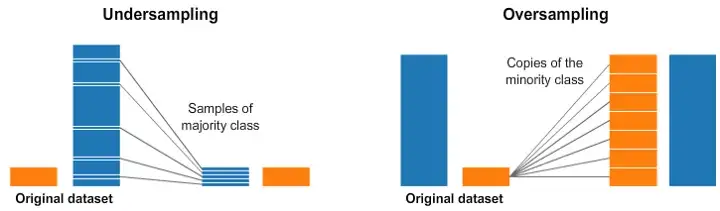

In [6]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/FSDS_Job_Gurantee/Machine_Learning/Cheat Sheet/Handle Imbalanced Dataset/Random Undersampling and Oversampling.jpeg") 
im

In [7]:
num_0 = len(df[df['Class'] == 0])
num_1 = len(df[df['Class'] == 1])
print(num_0,num_1)
"""Random Undersampling"""
undersampled_data = pd.concat([df[df['Class'] == 0].sample(num_1) , df[df['Class'] == 1] ])
print(len(undersampled_data))
"""Random Oversampling"""
oversampled_data = pd.concat([ df[df['Class'] == 0] , df[df['Class'] == 1].sample(num_0, replace=True) ])
print(len(oversampled_data))

9990 10
20
19980


In [8]:
undersampled_data['Class'].value_counts()

0    10
1    10
Name: Class, dtype: int64

In [9]:
oversampled_data['Class'].value_counts()

0    9990
1    9990
Name: Class, dtype: int64

**Observation:**
* After random sampling data is equally distributed

## **2. Undersampling and Oversampling using imbalanced-learn (SMOTE and TomekLinks)**
* imbalanced-learn(imblearn) is a Python Package to tackle the curse of imbalanced datasets
* It provides a variety of methods to undersample and oversample

## **a. Undersampling using Tomek Links:**
* One of such methods it provides is called Tomek Links. Tomek links are pairs of examples of opposite classes in close vicinity

* In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier

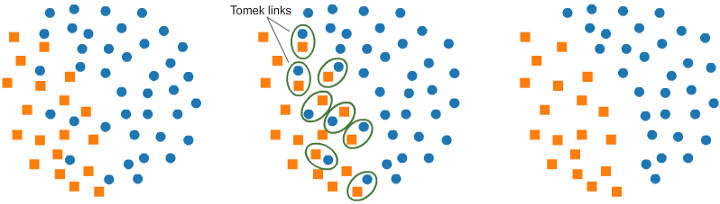

In [10]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/FSDS_Job_Gurantee/Machine_Learning/Cheat Sheet/Handle Imbalanced Dataset/TomekLinks.jpeg") 
im

In [11]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy = 'majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [12]:
pd.DataFrame(y_tl).value_counts()

Class
0        9986
1          10
dtype: int64

**Observation:**
* Only 5 data points from majority class was in close vicinity with minoriy class and and those are reduced from the majority class

### **b. Oversampling using SMOTE:**
* In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements

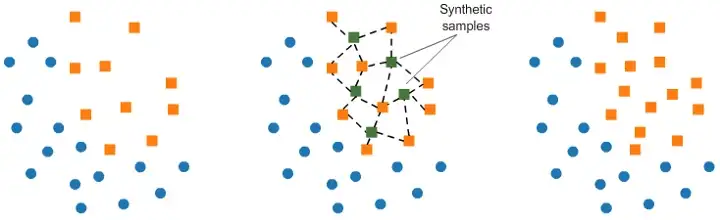

In [13]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/FSDS_Job_Gurantee/Machine_Learning/Cheat Sheet/Handle Imbalanced Dataset/SMOTE.jpeg") 
im

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [15]:
pd.DataFrame(y_sm).value_counts()

Class
0        9990
1        9990
dtype: int64

**Observation:**
* Both the class is equally distributed now

**Note:**
* There are a variety of other methods in the imblearn package for both undersampling(Cluster Centroids, NearMiss, etc.) and oversampling(ADASYN and bSMOTE) that you can check out

## **3. Class weights in the models**
* Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary

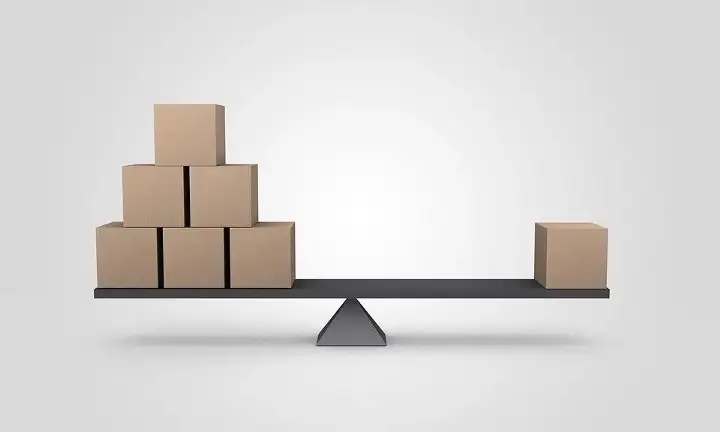

In [16]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/FSDS_Job_Gurantee/Machine_Learning/Cheat Sheet/Handle Imbalanced Dataset/class_weight.jpeg") 
im

**Example:**
```
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight={0:1,1:10})
```
But what happens exactly in the background?

In logistic Regression, we calculate loss per example using binary cross-entropy:
```
Loss = −ylog(p) − (1−y)log(1−p)
```
In this particular form, we give equal weight to both the positive and the negative classes. When we set class_weight as class_weight = {0:1,1:20}, the classifier in the background tries to minimize:
```
NewLoss = −20*ylog(p) − 1*(1−y)log(1−p)
```
So what happens exactly here?

* If our model gives a probability of 0.3 and we misclassify a positive example, the NewLoss acquires a value of -20log(0.3) = 10.45
* If our model gives a probability of 0.7 and we misclassify a negative example, the NewLoss acquires a value of -log(0.3) = 0.52

That means we penalize our model around twenty times more when it misclassifies a positive minority example in this case


**Note:**
* How can we compute class_weights?
  * There is no one method to do this, and this should be constructed as a hyperparameter search problem for your particular problem

## **4. Change your Evaluation Metric**
* Choosing the right evaluation metric is pretty essential whenever we work with imbalanced datasets. Generally, in such cases, the F1 Score is what I want as my evaluation metric

* The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall
<center>$F_1 = 2 * \frac{precision*recall} {precision + recall}$</center>

**Example:**
* How does it help?

* Let us start with a binary prediction problem. We are predicting if an asteroid will hit the earth or not

* So we create a model that predicts “No” for the whole training set

* What is the accuracy(Normally the most used evaluation metric)?
  * It is more than 99%, and so according to accuracy, this model is pretty good, but it is worthless.

* what is the F1 score?
  * Our precision here is 0. What is the recall of our positive class? It is zero. And hence the F1 score is also 0.

  * And thus we get to know that the classifier that has an accuracy of 99% is worthless for our case. And hence it solves our problem.

* Simply stated the F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low, and if the recall is low again, your F1 score is low.



## **5. Miscellaneous**
* Various other methods might work depending on your use case and the problem you are trying to solve:

* **Collect more Data**
  * This is a definite thing you should try if you can. Getting more data with more positive examples is going to help your models get a more varied perspective of both the majority and minority classes

* **Treat the problem as anomaly detection**
  * Anomaly detection is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data
  * You can use Isolation forests or autoencoders for anomaly detection.

*  **Model-based**
  * Some models are particularly suited for imbalanced datasets.
  * For example, in boosting models, we give more weights to the cases that get misclassified in each tree iteration

## **Conclusion**
* There is no fixed methods to handle imbalanced datasets. Choose the methods depends on the problem statement
* In this notebook, I have listed all the widely used methods to handle imbalanced datasets with practical